(content:fit-with-error)=
# Ajustement avec des données avec erreurs

La minimisation du coefficient de détermination $R^2$ défini de façon _ad hoc_ permet d'estimer la valeur des paramètres d'un modèle à partir d'un jeu de données.
Nous allons présenter ici d'autres quantités ayant des motivations probabilistes, notamment lorsque l'on peut associer à chaque mesure une erreur.

# Vraisemblance et moindre carrés

Une quantité d'intérêt est la **fonction de vraisemblance** [^Likelihood].
Considérons un jeu de données $\{x_i\} _{i=1...N}$.
On définit la fonction de vraisemblance $\mathcal{L}$ des données sachant un modèle comme étant la probabilité d'obtenir toutes les données $x_i$.
Si $p(x_i;\vec{\theta})$ est la probabilité d'obtenir la mesure $x_i$ avec le jeu de paramètres $\vec{\theta}$, la vraisemblance s'écrira donc:

$$
  \mathcal{L}(\vec{\theta}) = \prod _i p(x_i;\vec{\theta}).
$$ (vraisemblance)

On suppose toujours que les mesures sont indépendantes.
Si les données sont placées dans un histogramme, les $\{x_i\} _{i=1...N}$ sont le nombre de coups dans chaque bin, $p$ sera une probabilité suivant la loi de Poisson avec $\lambda$ la valeur attendue du bin prédite par le modèle et comme $k$ le nombre d'évènements $x_i$ dans le bin.
Le nombre de coups attendus $\lambda$ peut lui même suivre un autre modèle et dépendre d'autres paramètres.

Si les données sont des couples ou points $\left(x_i, y_i\right)$ avec des erreurs $\sigma _i$ sur les $y_i$ et que l'on souhaite tester une relation entre $X$ et $Y$ (comme par exemple une dépendance linéaire $Y=aX+b$), les points de données sont dispersés *normalement* (selon une loi gaussienne) autour de la prédiction du modèle et la vraisemblance peut s'écrire comme:

$$
  \mathcal{L}(\vec{\theta}) = \prod _i \frac{1}{\sqrt{2\pi}\sigma _i}\exp \left( -\frac{\left(y_i - f(x_i;\vec{\theta})\right)^2}{2\sigma _i^2} \right),
$$ (likelihood-gaussien)

avec $\theta$ les paramètres du modèle à tester.
Dans ce cas, le nombre de paramètres $\vec{\theta}$ dépend de la complexité du modèle; les valeurs de $\vec{\theta}$ qui maximisent $\mathcal{L}$ est le meilleur modèle par rapport aux données collectées.
<!-- % Notons que cela ne veut pas dire que c'est les paramètres les plus vraisemblables pour ce modèle puisque $\mathcal{L}$ ne contient pas la vraisemblance de ces paramètres a priori, c'est-à-dire avant l'obtention de ces mesures\footnote{Pour cela, il faudrait donc aussi prendre en compte la probabilité de ces paramètres avant les mesures et les intégrer à la vraisemblance. -->
<!-- % On peut utiliser le théorème de Bayes.}. -->
Ici on vient de calculer les paramètres qui rendent les données obtenues les plus probables pour un modèle donné.

On peut noter ici que puisque les probabilités $p(x_i;\vec{\theta})$ de l'équation {eq}`vraisemblance` sont plus petites que 1, la fonction de vraisemblance est plus petite que 1.
Notamment, plus le nombre de points de données augmente, plus la vraisemblance est faible. 

Dans le cas où on considère un modèle gaussien comme dans l'équation {eq}`likelihood-gaussien`, on peut utiliser la fonction $\ln$ pour simplifier le problème:

$$ 
  \chi ^2 = -2\ln \mathcal{L}(\vec{\theta}) = cste + \sum _i\frac{\left(y_i - f(x_i;\vec{\theta})\right)^2}{\sigma _i^2}.
$$ (def-chi2)

Le terme $cste$ est bien une constante ne dépendant que des erreurs des points de données $\sigma _i$.
Le $\chi^2$, aussi appelé **moindre carrés**, est la somme des écarts quadratiques entre le modèle et les données, pondérés par le carré inverse des incertitudes.
Maximiser la vraisemblance {eq}`likelihood-gaussien` revient à minimiser le $\chi ^2$ {eq}`def-chi2`.

Notons que cela peut s'étendre aussi aux cas des distributions poissonniennes pour des données binnées puisque la distribution de Poisson tend vers une distribution gaussienne quand le nombre d'évènements attendu est "grand"; en pratique, pour $\lambda \geq 25$.


````{exercise} 
:label: test-chi2
On réalise une trentaine de mesures d'une même grandeur.
On obtient les résultats rangés dans la liste suivante:

```{code-block} python
valeurs = [ 9.19, 11.30, 4.21, 7.88, 7.60, 11.87, 10.53, 12.32, 10.64, 7.21, 
            7.73, 12.02, 12.93, 10.05, 13.15, 9.55, 10.81, 12.51, 7.44, 11.52, 
            11.55, 9.38, 6.70, 11.00, 13.48, 8.18, 7.43, 11.37, 13.09, 9.21 ]
```

1.  Ranger les valeurs dans un histogramme avec 5 bins. La région globale de l'histogramme est entre 2.8 et 15.15.
2.  Calculer la vraisemblance des données en prenant comme modèle une loi normale d'écart-type 4 et centrée en 10.
    On pourra calculer le logarithme de la vraisemblance par commodité.
3.  Calculer le logarithme de la vraisemblance des données en prenant comme modèle une loi normale d'écart-type 2.4 et centrée en 10.
    Comparer avec la valeur obtenue dans la question précédente.
    Quelle modèle vous semble plus correct?
4.  Tracer le logarithme de la vraisemblance en fonction de l'écart-type de la loi normale: on gardera la moyenne de la loi normale fixé à 10.
    Estimer la valeur optimale de l'écart-type de la loi normale.
5.  Estimer la moyenne et l'écart-type de la population à partir de cet échantillon.
    Confirmer votre estimation de la question précédente.
````


````{solution} test-chi2
:class: dropdown

1.  ```{code-block} python
    valeurs = [ 9.19, 11.30, 4.21, 7.88, 7.60, 11.87, 10.53, 12.32, 10.64, 7.21, 
            7.73, 12.02, 12.93, 10.05, 13.15, 9.55, 10.81, 12.51, 7.44, 11.52, 
            11.55, 9.38, 6.70, 11.00, 13.48, 8.18, 7.43, 11.37, 13.09, 9.21 ]
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots() # creation d'un plot
    n, bins, _ = plt.hist(valeurs, bins=[2.8, 5.27, 7.74, 10.21, 12.68, 15.15])
    ```

2.  ```{code-block} python
    from math import sqrt, exp, log
    def normale(x, moy, std):
        return 1/sqrt(2*3.14159)/std*exp(-(x-moy)**2/(2*std**2))
    lnL = 0
    for valeur in valeurs:
        lnL = lnL + log(normale(valeur, 10, 4))
    print("lnL(10,4)=", lnL)
    ```
    
3.  ```{code-block} python
    lnL = 0
    for valeur in valeurs:
        lnL = lnL + log(normale(valeur, 10, 2.4))
    print("lnL(10,2.4)=", lnL)
    ```
    La vraisemblance a augmenté avec cette nouvelle valeur d'écart-type; ce nouveau modèle semble plus correct.

4.  ```{code-block} python
    def logL(moy, std):
        lnL = 0
        for valeur in valeurs:
            lnL = lnL + log(normale(valeur, moy, std))
        return lnL

    v_std = [1.+ 3.*i/20 for i in range(0, 20)]
    v_logL = [logL(10, s) for s in v_std]

    fig, ax = plt.subplots() # creation d'un plot
    plt.plot(v_std, v_logL, "o")
    plt.xlabel("Ecart-type loi normale")
    plt.ylabel("Log-vraisemblance")
    ```

    La valeur qui semble maximiser la vraisemblance est autour de 2.4.

5.  ```{code-block} python
    import numpy as np
    valeurs = [ 6.967, 9.582, 14.881, 8.981, 4.385, 9.424, 14.381, 7.896, 10.867, 9.242,
            8.430, 9.194, 9.417, 9.869, 12.418, 11.383, 10.119, 13.318, 11.134, 8.748,
            12.624, 13.815, 12.745, 7.874, 10.923, 8.243, 8.596, 6.824, 12.765, 10.988 ]

    moyenne = np.mean(valeurs)
    stdev = np.std(valeurs)
    print("Moyenne = {0:.3f}".format(moyenne))
    print("Ecart-type = {0:.3f}".format(stdev))
    ``` 

    La valeur de l'écart-type trouvée ici est très proche de la valeur estimée dans la question précédente.

````

lnL(10,4)= -74.03191478477355
lnL(10,2.4)= -67.37370718290495
Moyenne = 10.201
Ecart-type = 2.402


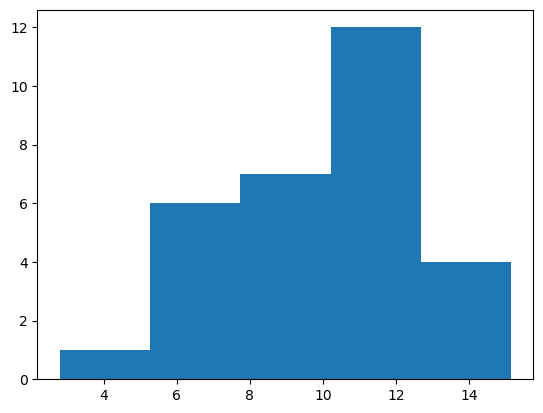

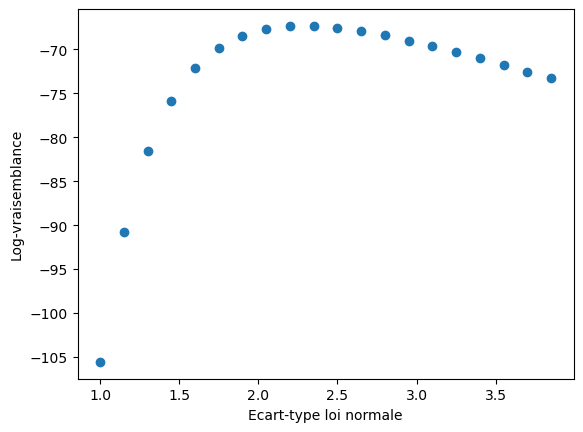

In [7]:
valeurs = [ 9.19, 11.30, 4.21, 7.88, 7.60, 11.87, 10.53, 12.32, 10.64, 7.21, 
        7.73, 12.02, 12.93, 10.05, 13.15, 9.55, 10.81, 12.51, 7.44, 11.52, 
        11.55, 9.38, 6.70, 11.00, 13.48, 8.18, 7.43, 11.37, 13.09, 9.21 ]
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # creation d'un plot
n, bins, _ = plt.hist(valeurs, bins=[2.8, 5.27, 7.74, 10.21, 12.68, 15.15])

from math import sqrt, exp, log
def normale(x, moy, std):
    return 1/sqrt(2*3.14159)/std*exp(-(x-moy)**2/(2*std**2))
lnL = 0
for valeur in valeurs:
    lnL = lnL + log(normale(valeur, 10, 4))
print("lnL(10,4)=", lnL)

lnL = 0
for valeur in valeurs:
    lnL = lnL + log(normale(valeur, 10, 2.4))
print("lnL(10,2.4)=", lnL)

def logL(moy, std):
    lnL = 0
    for valeur in valeurs:
        lnL = lnL + log(normale(valeur, moy, std))
    return lnL

v_std = [1.+ 3.*i/20 for i in range(0, 20)]
v_logL = [logL(10, s) for s in v_std]

fig, ax = plt.subplots() # creation d'un plot
plt.plot(v_std, v_logL, "o")
plt.xlabel("Ecart-type loi normale")
plt.ylabel("Log-vraisemblance")

import numpy as np
valeurs = [ 6.967, 9.582, 14.881, 8.981, 4.385, 9.424, 14.381, 7.896, 10.867, 9.242,
        8.430, 9.194, 9.417, 9.869, 12.418, 11.383, 10.119, 13.318, 11.134, 8.748,
        12.624, 13.815, 12.745, 7.874, 10.923, 8.243, 8.596, 6.824, 12.765, 10.988 ]

moyenne = np.mean(valeurs)
stdev = np.std(valeurs)
print("Moyenne = {0:.3f}".format(moyenne))
print("Ecart-type = {0:.3f}".format(stdev))




## Extraction des meilleurs paramètres

Trouver les meilleurs paramètres d'un modèle selon les données collectées revient à maximiser la vraisemblance ou bien minimiser le $\chi ^2$.
Cela peut se faire numériquement, par exemple, avec le module ```scipy.optimize``` ou bien analytiquement: en généralisant pour des paramètres $\vec{\theta}$, le système d'équations à résoudre est\footnote{Pour que ces paramètres minimisent bien le $\chi^2$, il faut aussi vérifier que $\left.\frac{\partial^2 \chi ^2}{\partial \vec{\theta}^2}\right\vert_{\vec{\theta}=\hat{\vec{\theta}}} > 0$.}:
\begin{equation}
  \left.\frac{\partial \chi ^2}{\partial \vec{\theta}}\right\vert_{\vec{\theta}=\hat{\vec{\theta}}} = 0.
\end{equation}

<!-- % Pour certains modèles, il est possible de trouver une expression analytique des meilleurs paramètres utilisant les valeurs des données. -->
En particulier, pour des modèles qui dépendent linéairement de ses paramètres comme par exemple $f(x) = ax+b$ ou $f(x) = a\sin x + be^x$, on peut résoudre le système:

$$
  \left.\frac{\partial \chi ^2}{\partial a}\right\vert_{a=\hat{a},b=\hat{b}} = \sum _i \frac{\partial f(x_i;\hat{a},\hat{b}) }{\partial a}\left( \frac{y_i - f(x_i;\hat{a},\hat{b})}{\sigma _i ^2} \right) =  0,
$$

$$
  \left.\frac{\partial \chi ^2}{\partial b}\right\vert_{a=\hat{a},b=\hat{b}} =  \sum _i \frac{\partial f(x_i;\hat{a},\hat{b}) }{\partial b}\left( \frac{y_i - f(x_i;\hat{a},\hat{b})}{\sigma _i ^2} \right) = 0
$$

pour $\hat{a}$ et $\hat{b}$ les paramètres optimaux du modèle.

## Cas d'un ajustement linéaire

Dans le cas fréquent où $f(x) = ax+b$, on peut résoudre le système en posant:
\begin{gather*}
  A=\sum_i \frac{x_iy_i}{\sigma _i ^2},\,B=\sum_i \frac{x_i^2}{\sigma _i ^2},\\
  C=\sum_i \frac{x_i}{\sigma _i ^2},\,D=\sum_i \frac{y_i}{\sigma _i ^2}\, \mathrm{et} \, E=\sum_i \frac{1}{\sigma _i ^2}.
\end{gather*}
La solution est alors:

$$
  \hat{a} = \frac{AE-DC}{BE-C^2} \, \mathrm{et} \, \hat{b} = \frac{DB-AC}{BE-C^2}.
$$ (solana-lineaire)

Dans le cas où $f(x) = ax$, l'expression du meilleur paramètre $\hat{a}$ se simplifie comme:

$$
  \hat{a} = \frac{A}{B}.
$$ (linearfit-analytical)

(admon:linearfit_2)=
```{admonition} Exemple: Ajustement linéaire simple -- suite
En reprenant les données dans la table [](tab-linear-data) ainsi que des erreurs associées, on peut calculer les valeurs optimales paramètres de pente et d'intersection à l'origine en utilisant

-  une minimisation de $\chi ^2$ donné par l'équation {eq}`def-chi2`,
- les relations analytiques {eq}`solana-lineaire`.

On peut voir que les résultats trouvés par les trois méthodes sont proches (ce qui est rassurant).
En revanche, les paramètres sont différents que ceux trouvés par la méthode sans erreur du premier exemple.
Cela est du au fait que les points de données n'ont pas la même erreur, et donc le même poids.
```

[^Likelihood]: Likelihood en anglais.

In [8]:
from scipy.optimize import curve_fit
import numpy as np
import qexpy
import qexpy.plotting as qplt

x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
y = np.array([1.2, 1.6, 1.7, 2.2, 2.3, 2.4, 3.1, 3.3, 3.1, 3.7])
err_y = np.array([0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4])

def f(x,a,b):
    return a*x+b

# ajustement par curve_fit
valeurs, cov = curve_fit(f, x, y,sigma=err_y)
a_fit = valeurs[0]
b_fit = valeurs[1]

# ajustement par qexpy
xmeas = qexpy.MeasurementArray(x, name="x")
ymeas = qexpy.MeasurementArray(y, error=err_y, name="y")
fig = qplt.plot(xmeas, ymeas, name='données', residuals=True)
result = fig.fit(model=qexpy.FitModel.LINEAR)
a_qexpy = result.params[0].value # extraction de a
b_qexpy = result.params[1].value # extraction de b
qplt.show()

# méthode par les relations analytiques
A = 0
B = 0 
C = 0 
D = 0 
E = 0
for i in range(len(x)):
    A += x[i]*y[i]/(err_y[i]*err_y[i])
    B += x[i]*x[i]/(err_y[i]*err_y[i])
    C += x[i]/(err_y[i]*err_y[i])
    D += y[i]/(err_y[i]*err_y[i])
    E += 1./(err_y[i]*err_y[i])
a_ana = (A*E-D*C)/(B*E-C*C)
b_ana = (D*B-A*C)/(B*E-C*C)

print('''Résultats:
Curve fit: a = {:.2f}; b = {:.2f}
QExPy: a = {:.2f}; b = {:.2f}
Analytique: a = {:.2f}; b = {:.2f}'''.format(a_fit, b_fit, a_qexpy, b_qexpy, a_ana, b_ana))

ModuleNotFoundError: No module named 'qexpy'

L'utilisation des librairies externes permet de réaliser des ajustements plus complexes qui ne possèdent pas de solution analytique; il est cependant important de les comparer avec des relations analytiques ("benchmarking") afin de vérifier que les résultats données correspondent à ce que l'on attend.

## Extraction de l'erreur sur un paramètre

Lorsqu’on ajuste un modèle à des données expérimentales, il ne suffit pas de déterminer les **meilleurs paramètres** (ceux qui minimisent le $\chi^2$). Il est tout aussi important d’estimer les **intervalles de confiance** associés à ces paramètres. Ces intervalles indiquent la plage de valeurs dans laquelle le paramètre a une certaine probabilité de se trouver, en tenant compte des incertitudes expérimentales.

L'erreur sur un paramètre est défini en terme de probabilité d'obtenir la vraie valeur à partir des données mesurées: il faut intégrer la fonction de vraisemblance sur l'intervalle de confiance définie par la valeur moyenne $\theta$ et l'erreur $\sigma_{\theta}$ sur les paramètres $\left[\theta-\sigma_{\theta},\theta+\sigma_{\theta}\right]$.
En général, c'est un travail très complexe car la fonction de vraisemblance peut contenir des densité de probabilité complexe à écrire et intégrer; de plus, le nombre de dimensions à intégrer est égal au nombre de paramètres du modèle, rendant le calcul impraticable lorsque le nombre de paramètres est très grand.

Cependant, pour des modèles simples comme des modèles linéaires avec des distributions gaussiennes des données, il est possible de calculer les erreurs sur les paramètres en utilisant le $\chi ^2$ {eq}`def-chi2`.

Définition des intervalles de confiance :
Pour estimer l’erreur sur un paramètre $\theta$ (par exemple, la pente $a$ ou l’ordonnée à l’origine $b$, on utilise la **différence de \(\chi^2\)** par rapport à sa valeur minimale :
\[
\Delta \chi^2 = \chi^2(\theta) - \chi^2_{\text{min}}
\]
- $\chi^2_{\text{min}}$ est la valeur minimale de $chi^2$ obtenue avec les paramètres optimaux $\tilde{\theta}$.
- $\chi^2(\theta)$ est la valeur de $\chi^2$ calculée pour une valeur donnée de $\theta$, en gardant les autres paramètres fixes.

Pour un **niveau de confiance $(1 - \alpha\$**, l’intervalle de confiance est défini par :
\[
\Delta \chi^2 \leq -2 \ln(1 - \alpha)
\]
Cette relation provient de la distribution du $\chi^2$ à 1 degré de liberté. Le terme $(-2 \ln(1 - \alpha)$ représente le **quantile** de cette distribution pour le niveau de confiance $(1 - \alpha)$.

**Lien avec la distribution gaussienne**
Pour une **distribution gaussienne**, l’intervalle de confiance à **68,3%** correspond à un écart de **±1σ** autour de la moyenne. Cela signifie que, si un paramètre suit une distribution gaussienne, il y a **68,3% de chances** que sa vraie valeur se situe dans l’intervalle \([ \mu - \sigma, \mu + \sigma ]\), où :
- **\(\mu\)** est la moyenne (ou la valeur optimale du paramètre),
- **\(\sigma\)** est l’écart-type (ou l’erreur standard sur le paramètre).

Dans le contexte de l’ajustement de modèles, lorsque les données suivent une distribution gaussienne et que les erreurs sont bien estimées, l’intervalle de confiance à 68,3% obtenu via la méthode du \(\chi^2\) (avec \(-2 \ln(1 - \alpha) \approx 1.0\)) est **équivalent** à l’intervalle ±1σ. Cela permet de relier directement la méthode du \(\chi^2\) aux concepts classiques de la statistique gaussienne.

**Application aux paramètres d’un ajustement linéaire**

Dans le cas simple d'un ajustement linéaire $y=ax+b$, les erreurs sur les paramètres $a$ et $b$ sont définis par:

$$
\Delta a \,\mathrm{tel\,que\,}\, \chi^{2}(a+\Delta a, \hat{b})=\chi^{2}(a-\Delta a, \hat{b})=\chi_{\min }^{2}-2 \ln (1-\alpha),
$$ (err-a)

$$ 
 \Delta b \,\mathrm{tel\,que\,}\, \chi^{2}(\hat{a}, b+\Delta b)=\chi^{2}(\hat{a}, b-\Delta b)=\chi_{\min }^{2}-2 \ln (1-\alpha),
$$

avec $\alpha$ la probabilité souhaitée.
Graphiquement, on peut construire ces intervalles comme sur la figure ci-dessous: le minimum de la courbe de $\chi^2$ est en $a=2$ et l'erreur à 1-$\sigma$ ($\alpha=68\%$) se construit en déterminant les abscisses des points d'intersection de la courbe $\chi^2$ avec la courbe $y=\chi^2_{\mathrm{min}}+1$.

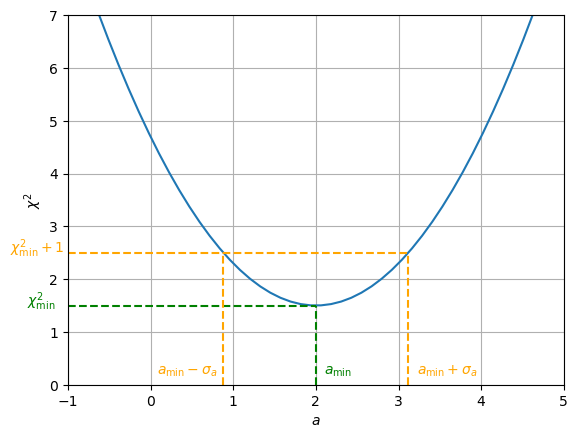

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def parabola(x):
    return 1.5+0.8*(x-2)**2

list_x = np.linspace(-1,5)
list_y = parabola(list_x)
plt.plot(list_x,list_y)
# minimum of the curve
plt.hlines(1.5,-1,2,linestyles="dashed",colors="green")
plt.vlines(2,0,1.5,linestyles="dashed",colors="green")
plt.text(-1.5,1.5,r"$\chi^2_{\mathrm{min}}$",color="green")
plt.text(2+0.1,0.2,r"$a_{\mathrm{min}}$",color="green")
# error on the curve
plt.hlines(2.5,-1,2+1/np.sqrt(0.8),linestyles="dashed",colors="orange")
plt.vlines(2-1/np.sqrt(0.8),0,2.5,linestyles="dashed",colors="orange")
plt.vlines(2+1/np.sqrt(0.8),0,2.5,linestyles="dashed",colors="orange")
plt.text(-1.7,2.5,r"$\chi^2_{\mathrm{min}}+1$",color="orange")
plt.text(2-1/np.sqrt(0.8)-0.8,0.2,r"$a_{\mathrm{min}}-\sigma_a$",color="orange")
plt.text(2+1/np.sqrt(0.8)+0.1,0.2,r"$a_{\mathrm{min}}+\sigma_a$",color="orange")
plt.grid()
plt.xlim(-1,5)
plt.ylim(0,7)
plt.xlabel(r"$a$")
a= plt.ylabel(r"$\chi^2$")


Ces erreurs valent:

$$
    \Delta a=\frac{\sqrt{-2 \ln (1-\alpha)}}{\sqrt{B}}=\frac{\sqrt{-2 \ln (1-\alpha)}}{\sqrt{\sum \frac{x_{1}^{2}}{\left(\Delta y_{1}\right)^{2}}}},
$$ (error-linearfit-a)

$$ 
    \Delta b=\frac{\sqrt{-2 \ln (1-\alpha)}}{\sqrt{E}}=\frac{\sqrt{-2 \ln (1-\alpha)}}{\sqrt{\sum \frac{1}{\left(\Delta y_{i}\right)^{2}}}}.
$$ (error-linearfit-b)

# Le terme $\sqrt{-2 \ln (1-\alpha)}$ vaut:

# - pour une erreur définie "à un sigma", $\alpha=68.3~\%$, alors $\sqrt{-2 \ln (1-\alpha)} = 1.52$,
# - pour une erreur définie "à deux sigmas", $\alpha=95.4~\%$, alors $\sqrt{-2 \ln (1-\alpha)} = 2.49$,
# - pour une erreur définie "à trois sigmas", $\alpha=99.7~\%$, alors $\sqrt{-2 \ln (1-\alpha)} = 3.44$.

<!-- % Dans de distributions de données gaussiennes, les erreurs sur les paramètres du modèle sont estimées par la dérivée de la fonction de vraisemblance \ref{eq:likelihood-gaussien} (et par conséquent au $\chi ^2$ \ref{eq:def-chi2}):
% \begin{equation}
%     \sigma _{\theta}^2 = \frac{1}{\left(\frac{\partial \ln \mathcal{L}}{\partial \theta}\right)^2}= \frac{-1}{\frac{\partial ^2 \ln \mathcal{L}}{\partial \theta^2}} = \frac{1}{\frac{1}{2}\frac{\partial ^2 \chi ^2}{\partial \theta ^2}} .
% \end{equation}

% \todo[inline]{Ajouter le calcul des erreurs sur les paramètres d'ajustement} -->

```{admonition} Exemple: Ajustement linéaire simple -- suite et fin
En reprenant les données dans la table [](tab-linear-data), on peut calculer les erreurs en utilisant les relations {eq}`error-linearfit-a` et {eq}`error-linearfit-b`.
```

In [ ]:
import numpy as np

x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
y = np.array([1.2, 1.6, 1.7, 2.2, 2.3, 2.4, 3.1, 3.3, 3.1, 3.7])
err_y = np.array([0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4])
from math import sqrt

# relations analytiques
B = 0 
E = 0
for i in range(len(x)):
    B += x[i]*x[i]/(err_y[i]*err_y[i])
    E += 1./(err_y[i]*err_y[i])

a_error2 = 1.52/sqrt(B)
b_error2 = 1.52/sqrt(E)

print("Erreur sur a: {:.2f}".format(a_error2))
print("Erreur sur b: {:.2f}".format(b_error2))

Erreur sur a: 0.03
Erreur sur b: 0.15


L'erreur sur $a$ correspond à un intervalle à 68.3 % autour de la meilleure valeur de $a$ (ici, 0.27).
De par sa définition {eq}`err-a`, cette erreur prend en compte la corrélation avec le coefficient $b$.
Certains algorithmes comme QExPy donnent une valeur d'erreur sur les paramètres ajustés qui ne prend pas en compte les corrélations entre les paramètres, mais donnent la valeur de corrélation avec l'erreur.
Il est donc important de toujours comparer le résultat et notamment les erreurs données par un algorithme ou une librairie au résultat donné par la méthode analytique afin de vérifier que les conventions sont identiques.

(content:chi2-histo)=
## Ajustement d'un histogramme

Lorsque les données suivant une certaine loi de probabilité $f(x;\vec{\theta})$ sont rangées dans un histogramme, il est possible d'estimer les paramètres de cette densité de probabilité.
Pour cela on construit la fonction de vraisemblance {eq}`vraisemblance` en supposant que le contenu de chaque classe $N_i$ est distribué selon une loi poissonienne autour de la valeur vraie $f(x_i;\vec{\theta})\times \delta x$ où $x_i$ représente le centre de la classe et $\delta x$ la largeur de la classe: on a alors
\begin{equation}
  \mathcal{L}(\vec{\theta}) = \prod _i \frac{e^{-f(x_i;\vec{\theta}) \delta x}\left(f(x_i;\vec{\theta}) \delta x\right)^{N_i}}{N_i !}.
\end{equation}

Dans le cas où le nombre de coups dans chaque classe est grand ($N_i>25$), on peut faire l'approximation de la densité de Poisson par une loi normale d'écart type $\sigma _i = \sqrt{N_i}$.
La maximisation de la fonction de vraisemblance est alors la minimisation du $\chi ^2$:
\begin{equation}
    \chi ^2 = \sum _i\frac{\left(N_i - f(x_i;\vec{\theta})\delta x\right)^2}{N_i}.
\end{equation}
